<a target="_blank" href="https://colab.research.google.com/github/am2145/ai-science-training-series/blob/main/01_intro_AI_on_Supercomputer/HW1_AI_science_angirasm.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Please open in Colab for proper formatting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

### Dataset
We used a realestate dataset from Kaggle to produce this reduced dataset. This dataset contains the _sale price_ and _above ground square feet_ of many houses. We can use this data for our linear regression.

We use Pandas to read the data file which is stored as Comma Separated Values (CSV). and print the column labels. CSV files are similar to excel sheets.

In [ ]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

--2024-02-09 19:07:03--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2024-02-09 19:07:03 (66.9 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<Axes: xlabel='GrLivArea'>

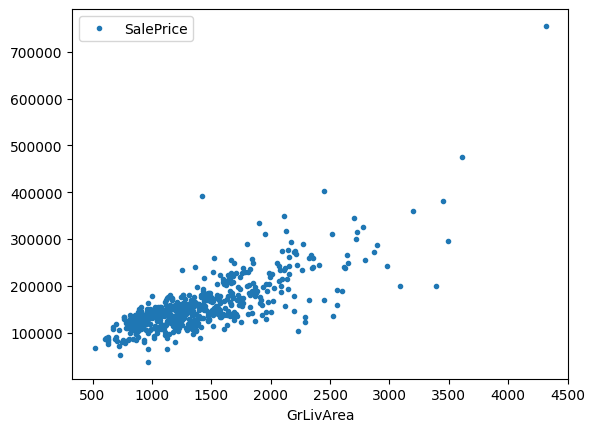

In [ ]:
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [ ]:
n = len(data)

In [ ]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [ ]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [ ]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [ ]:
denominator = n * sum_x2 - sum_x * sum_x

In [ ]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [ ]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

In [ ]:
def model(x,m,b):
   return m * x + b

In [ ]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [ ]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

## MiniBatch Training - Homework 1 Solution

In [ ]:
def regression_mini_batch(input_data, init_m, init_b, lr_m, lr_b, batch_size_list):
  # batch_size = 60
  # set a learning rate for each parameter
  learning_rate_m = lr_m
  learning_rate_b = lr_b

  for batch_size in batch_size_list:
    # set our initial slope and intercept
    m = init_m
    b = init_b
    # use these to plot our progress over time
    loss_history = []

    # we run our loop N times
    loop_N = 30*len(input_data)//batch_size
    for i in range(loop_N):

      # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
      data_batch = input_data.sample(batch_size)
      data_x = data_batch['GrLivArea'].to_numpy()
      data_y = data_batch['SalePrice'].to_numpy()

      # update our slope and intercept based on the current values
      m = updated_m(data_x,data_y,m,b,learning_rate_m)
      b = updated_b(data_x,data_y,m,b,learning_rate_b)

      # calculate the loss value
      loss_value = np.mean(loss(data_x,data_y,m,b))

      # keep a history of our loss values
      loss_history.append(loss_value)

    # print our progress
    print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

    # close/delete previous plots
    plt.close('all')

    # create a 1 by 2 plot grid
    print(f"Showing regression results for batch size: {batch_size}")
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # plot the full data output and fit.
    data_full_x = input_data['GrLivArea'].to_numpy()
    data_full_y = input_data['SalePrice'].to_numpy()
    plot_data(data_full_x,data_full_y,m,b,ax[0])

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_full_x.min(),data_full_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    # plot the loss
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()
    # gives us time to see the plot
    #time.sleep(2.5)
    # clears the plot when the next plot is ready to show.
    #ipydis.clear_output(wait=True)

[029]  dy_i = 88.89 * x + 32912.24     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641292
Showing regression results for batch size: 551


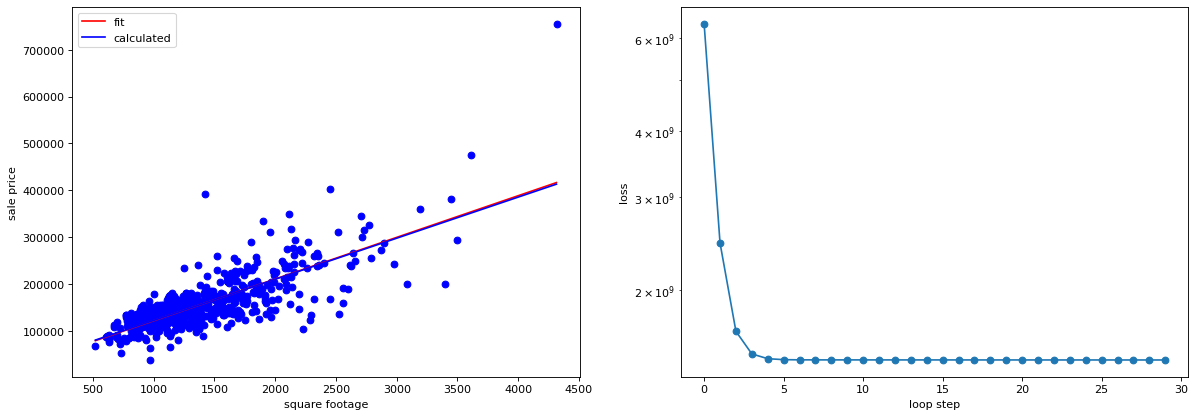

In [ ]:
regression_mini_batch(data, 5., 1000., 1e-7, 1e-1, [len(data)]) #Reproduce no batching example

[515]  dy_i = 82.52 * x + 31118.48     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1153282904.823108
Showing regression results for batch size: 32


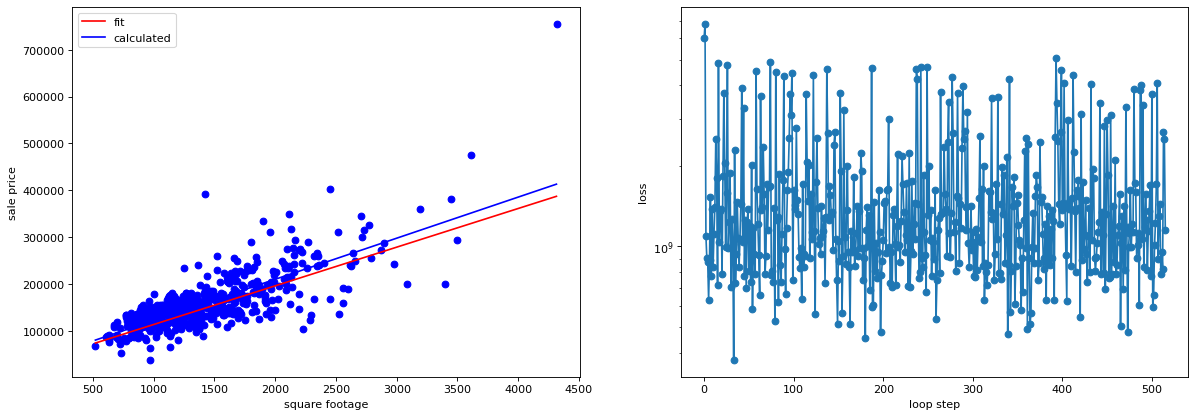

[257]  dy_i = 86.26 * x + 34061.93     previously calculated: y_i = 87.69 * x + 34754.08    loss: 873145742.181009
Showing regression results for batch size: 64


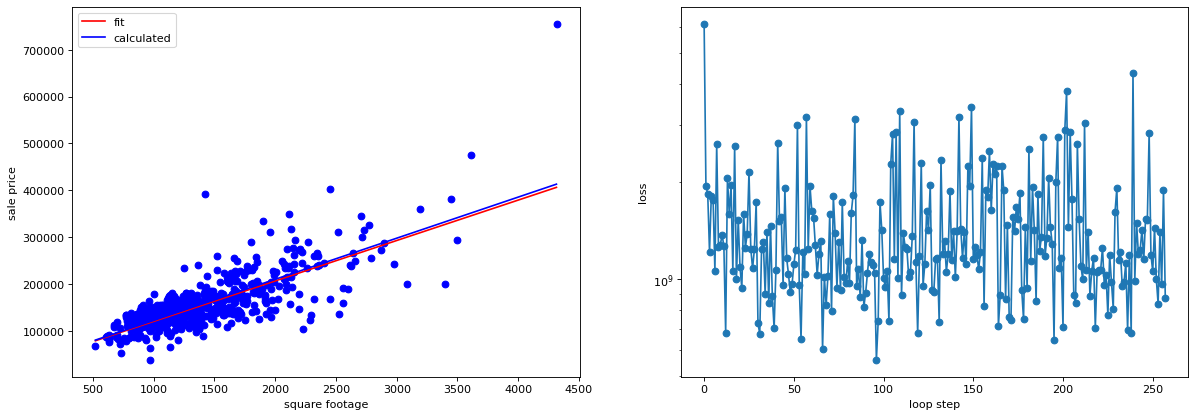

[128]  dy_i = 91.12 * x + 31205.64     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1419000718.137847
Showing regression results for batch size: 128


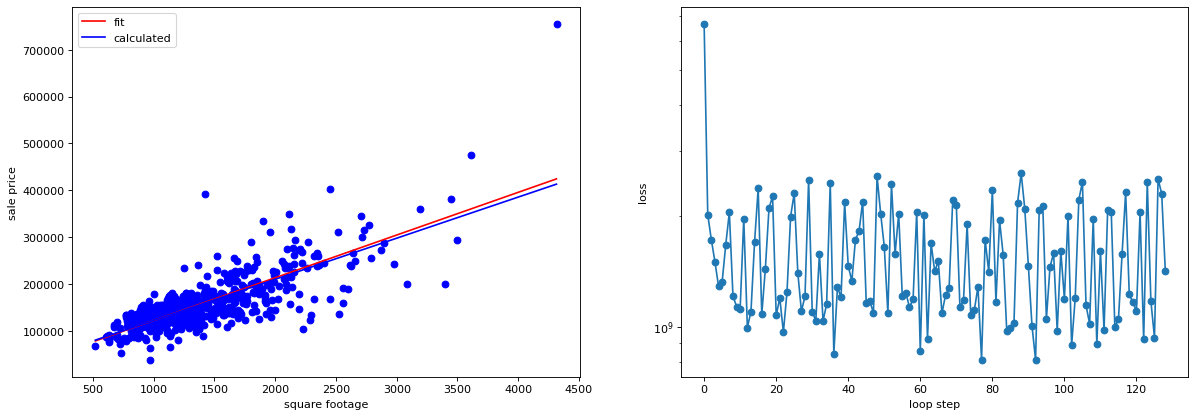

[063]  dy_i = 89.95 * x + 32639.79     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1292524567.567992
Showing regression results for batch size: 256


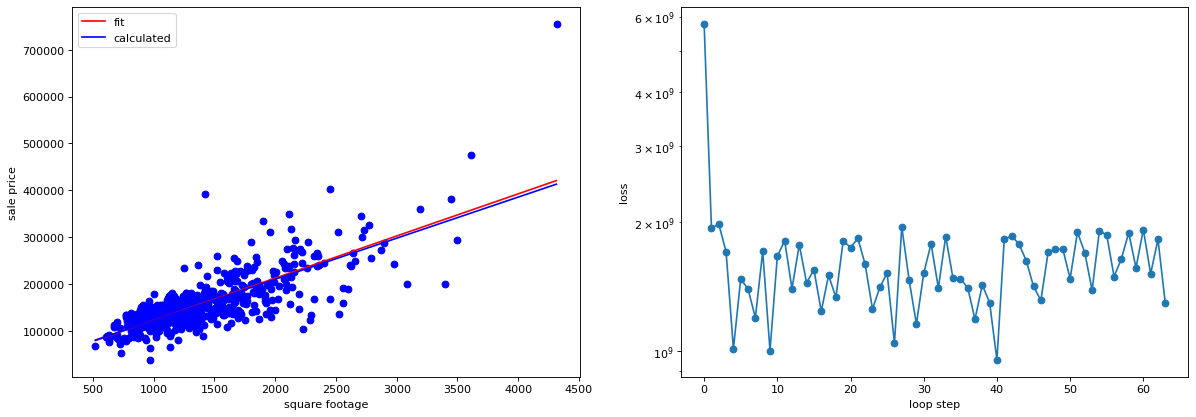

[031]  dy_i = 88.91 * x + 33400.04     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1529038030.637259
Showing regression results for batch size: 512


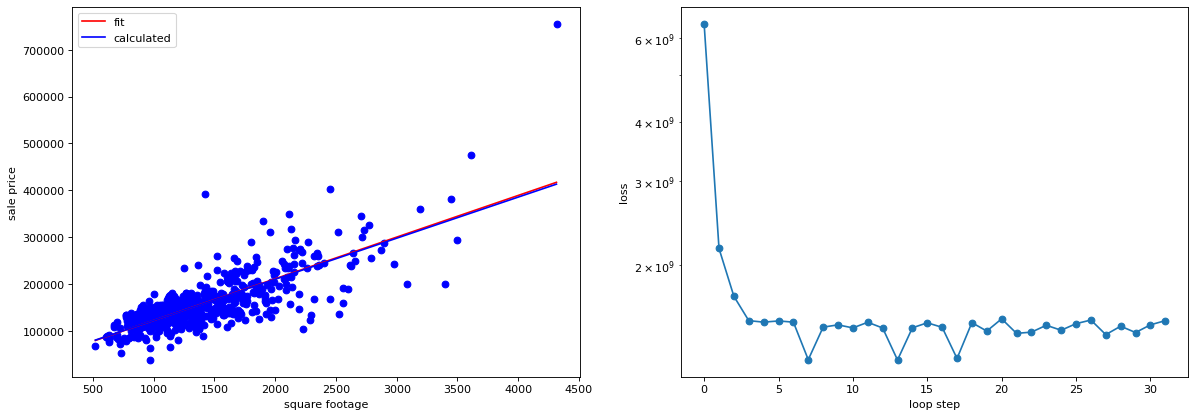

In [ ]:
regression_mini_batch(data, 5., 1000., 1e-7, 1e-1, [32, 64, 128, 256, 512]) # vary the batch sizes.

## Investigate learning rate issues - Bonus

In [ ]:
def regression_mini_batch(input_data, init_m, init_b, lr_m, lr_b, batch_size_list, multiplier_list):
  # batch_size = 60
  # set a learning rate for each parameter
  for multiplier in multiplier_list:
    learning_rate_m = lr_m * multiplier
    learning_rate_b = lr_b * multiplier

    for batch_size in batch_size_list:
      mult_batch_size = batch_size * multiplier

      # set our initial slope and intercept
      m = init_m
      b = init_b
      # use these to plot our progress over time
      loss_history = []

      # we run our loop N times
      loop_N = 30*len(input_data)//mult_batch_size
      for i in range(loop_N):

        # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
        data_batch = input_data.sample(mult_batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()

        # update our slope and intercept based on the current values
        m = updated_m(data_x,data_y,m,b,learning_rate_m)
        b = updated_b(data_x,data_y,m,b,learning_rate_b)

        # calculate the loss value
        loss_value = np.mean(loss(data_x,data_y,m,b))

        # keep a history of our loss values
        loss_history.append(loss_value)

      # print our progress
      print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

      # close/delete previous plots
      plt.close('all')

      # create a 1 by 2 plot grid
      print(f"Showing regression results for batch size: {mult_batch_size}, m learning rate {learning_rate_m}, and b learning rate {learning_rate_b}" )
      fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
      # plot the full data output and fit.
      data_full_x = input_data['GrLivArea'].to_numpy()
      data_full_y = input_data['SalePrice'].to_numpy()
      plot_data(data_full_x,data_full_y,m,b,ax[0])

      # here we also plot the calculated linear fit for comparison
      line_x = np.arange(data_full_x.min(),data_full_x.max())
      line_y = line_x * m_calc + b_calc
      ax[0].plot(line_x,line_y,'b-',label='calculated')
      # add a legend to the plot and x/y labels
      ax[0].legend()
      ax[0].set_xlabel('square footage')
      ax[0].set_ylabel('sale price')

      # plot the loss
      loss_x = np.arange(0,len(loss_history))
      loss_y = np.asarray(loss_history)
      ax[1].plot(loss_x,loss_y, 'o-')
      ax[1].set_yscale('log')
      ax[1].set_xlabel('loop step')
      ax[1].set_ylabel('loss')
      plt.show()
      # gives us time to see the plot
      #time.sleep(2.5)
      # clears the plot when the next plot is ready to show.
      #ipydis.clear_output(wait=True)

[257]  dy_i = 90.40 * x + 32615.86     previously calculated: y_i = 87.69 * x + 34754.08    loss: 2873065168.751333
Showing regression results for batch size: 64, m learning rate 1e-07, and b learning rate 0.1


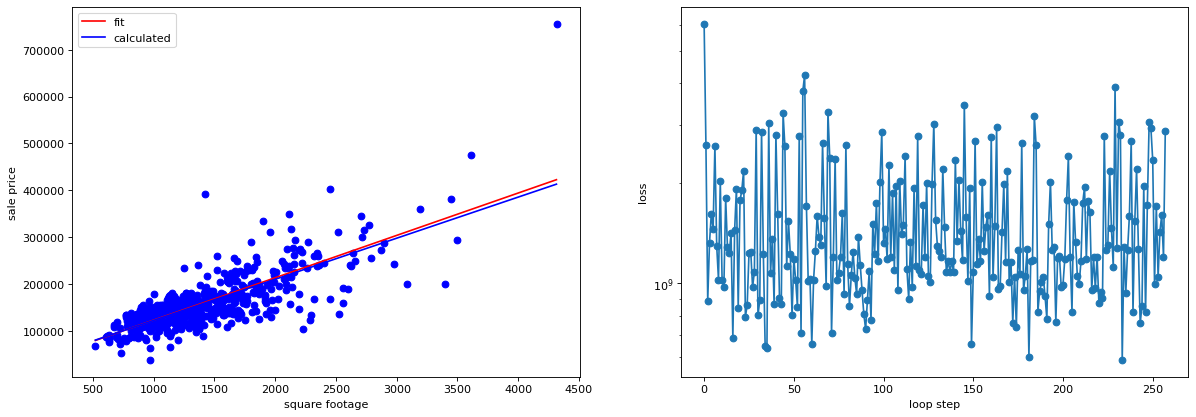

[128]  dy_i = 90.15 * x + 33335.28     previously calculated: y_i = 87.69 * x + 34754.08    loss: 2445634252.398743
Showing regression results for batch size: 128, m learning rate 2e-07, and b learning rate 0.2


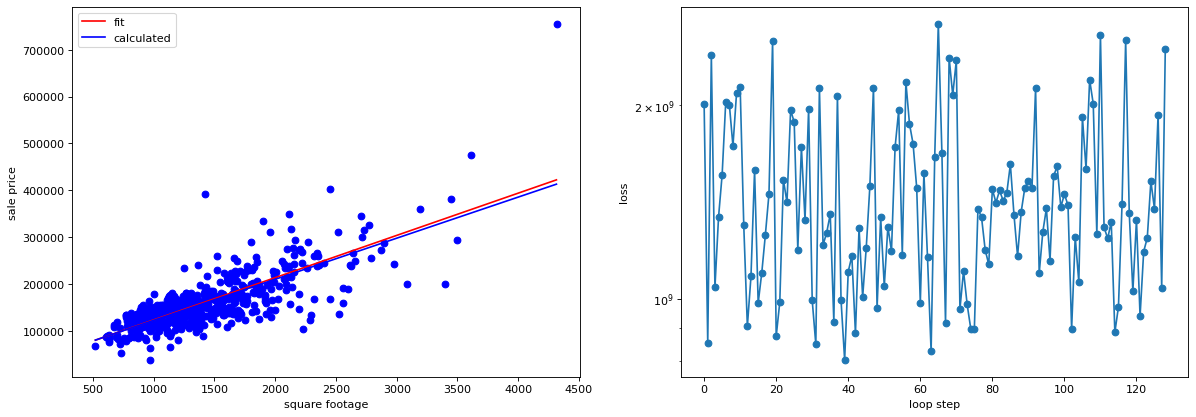

[063]  dy_i = 93.27 * x + 30834.59     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1712989501.286795
Showing regression results for batch size: 256, m learning rate 4e-07, and b learning rate 0.4


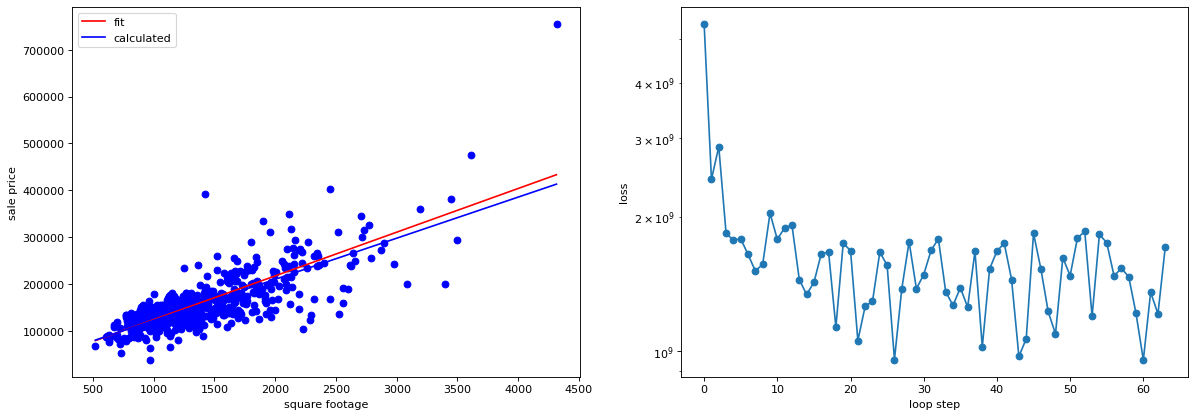

[042]  dy_i = 85.11 * x + 37714.35     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1642432371.617049
Showing regression results for batch size: 384, m learning rate 6e-07, and b learning rate 0.6000000000000001


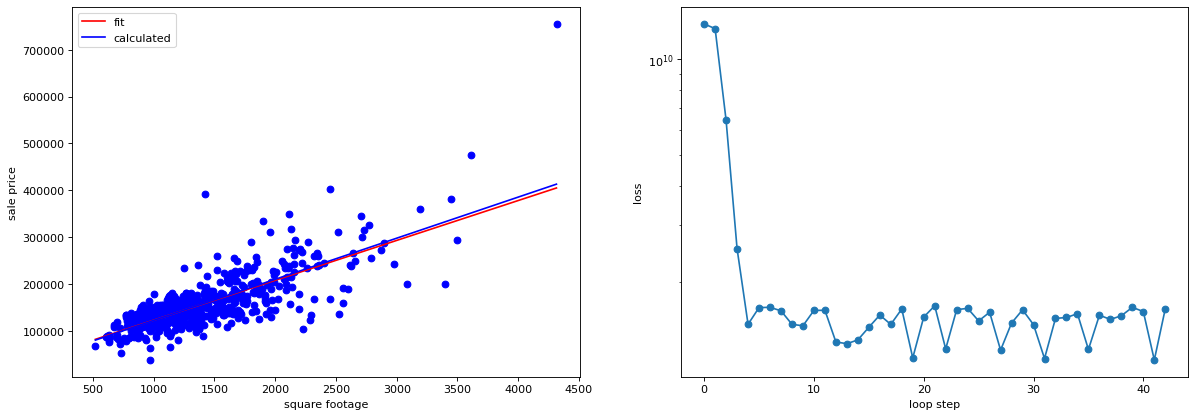

[031]  dy_i = -591352.79 * x + 1027149707.28     previously calculated: y_i = 87.69 * x + 34754.08    loss: 134257278556557504.000000
Showing regression results for batch size: 512, m learning rate 8e-07, and b learning rate 0.8


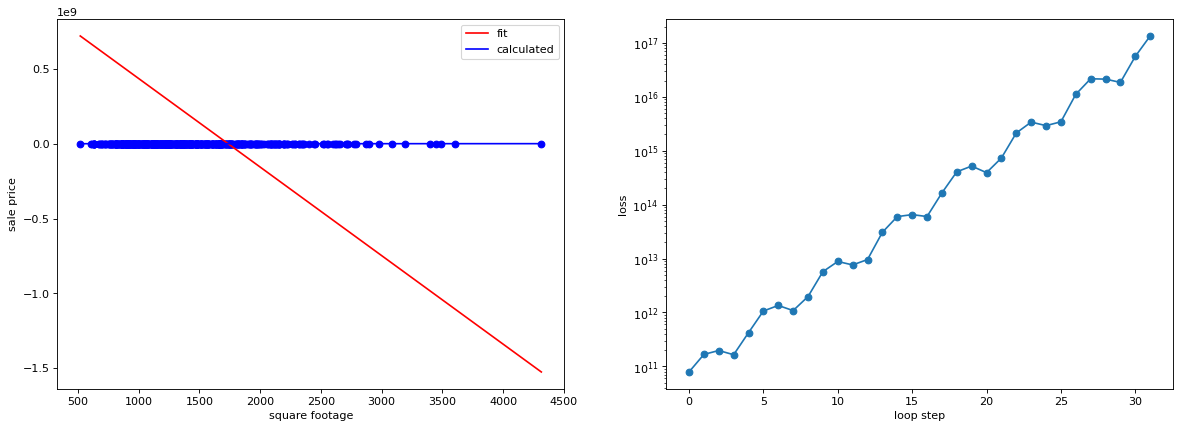

In [ ]:
regression_mini_batch(data, 5., 1000., 1e-7, 1e-1, [64], [1,2,4,6,8]) # Try various multipliers for the batch size and learning rates. We see training fails to converge at a multiplier of 8 in this set.